# Problem 1

a. 

$\min |Ax-b|_1$

$\text{s.t.} \: A \in \mathbb{R}^{m x n}, b \in \mathbb{R}^m$

b.

$\min \max f_i(x)$

$\text{s.t.} \: f_i(x) = a_i^Tx+b_i \: \forall i \in F$

c.

This problem can be represented as a separable linear support vector machine optimization problem:

$\min \frac{1}{2} ||w||_2^2$

$\text{s.t.} \: \epsilon_{+,-}(w^Tx_i+b) = \epsilon \: \forall i \in [1, p]$

$\: \: \: \: \: \: \epsilon_{+,-}(w^Ty_i+b) = \epsilon \: \forall i \in [1, q]$

$\: \: \: \: \: \: \epsilon_{+, -} \in \{\epsilon, -\epsilon\}$

# Problem 2

In [2]:
using JuMP, GAMS

model_2a = Model(GAMS.Optimizer)
set_optimizer_attribute(model_2a, GAMS.ModelType(), "LP")

@variables(model_2a, begin 
    x_1
    x_2 <= 0
    x_3 >= 0
end)

@constraints(model_2a, begin
    y_1, x_1 + x_2 + x_3 == 10
    y_2, x_1 - 4x_2 + 2x_3 >= 30
end)

@objective(model_2a, Min, x_1 - 2x_2 + 3x_3)

print(model_2a)
optimize!(model_2a)

--- Job moi.gms Start 11/13/23 19:05:55 45.1.0 88bbff72 WEX-WEI x86 64bit/MS Windows
--- Applying:
    B:\GAMS\gmsprmNT.txt
--- GAMS Parameters defined
    Input C:\Users\maste\AppData\Local\Temp\gams_jl_3sgZAv\moi.gms
    ScrDir C:\Users\maste\AppData\Local\Temp\gams_jl_3sgZAv\225a\
    SysDir B:\GAMS\
    CurDir C:\Users\maste\AppData\Local\Temp\gams_jl_3sgZAv\
    LimRow 0
    LimCol 0
    SolPrint 0
    SavePoint 1
    SolveLink 5
    Threads 1
Licensee: GAMS Demo, for EULA and demo limitations see   G230930/0001CB-GEN
          https://www.gams.com/latest/docs/UG%5FLicense.html         DC0000
          B:\GAMS\gamslice.txt
          Demo license for demonstration and instructional purposes only
Processor information: 1 socket(s), 16 core(s), and 32 thread(s) available
GAMS 45.1.0   Copyright (C) 1987-2023 GAMS Development. All rights reserved
--- Starting compilation
--- moi.gms(55) 3 Mb
--- Starting execution: elapsed 0:00:00.005
--- moi.gms(18) 4 Mb
--- Generating LP model m
---

In [3]:
println("Optimal value: ", objective_value(model_2a))
println("x_1 = ", value.(x_1))
println("x_2 = ", value.(x_2))     
println("x_3 = ", value.(x_3))

Optimal value: 22.0
x_1 = 14.0
x_2 = -4.0
x_3 = 0.0


In [4]:
if has_duals(model_2a) == true
    println("y_1 = ", dual(y_1))
    println("y_2 = ", dual(y_2))
            
end

y_1 = 0.3999999999999999
y_2 = 0.6000000000000001


From the code above, the dual solution is at $\vec{y} = [0.4, 0.6].$

In [5]:
# part b

# dual
model_2b = Model(GAMS.Optimizer)
set_optimizer_attribute(model_2b, GAMS.ModelType(), "LP")

@variables(model_2b, begin 
    y_1
    y_2 >= 0
end)

@constraints(model_2b, begin
    y_1 + y_2 == 1
    y_1 - 4y_2 >= -2
    y_1 + 2y_2 <= 3
end)

@objective(model_2b, Max, 10y_1 + 30y_2)

print(model_2b)
optimize!(model_2b)

--- Job moi.gms Start 11/13/23 19:05:59 45.1.0 88bbff72 WEX-WEI x86 64bit/MS Windows
--- Applying:
    B:\GAMS\gmsprmNT.txt
--- GAMS Parameters defined
    Input C:\Users\maste\AppData\Local\Temp\gams_jl_s6OdVX\moi.gms
    ScrDir C:\Users\maste\AppData\Local\Temp\gams_jl_s6OdVX\225a\
    SysDir B:\GAMS\
    CurDir C:\Users\maste\AppData\Local\Temp\gams_jl_s6OdVX\
    LimRow 0
    LimCol 0
    SolPrint 0
    SavePoint 1
    SolveLink 5
    Threads 1
Licensee: GAMS Demo, for EULA and demo limitations see   G230930/0001CB-GEN
          https://www.gams.com/latest/docs/UG%5FLicense.html         DC0000
          B:\GAMS\gamslice.txt
          Demo license for demonstration and instructional purposes only
Processor information: 1 socket(s), 16 core(s), and 32 thread(s) available
GAMS 45.1.0   Copyright (C) 1987-2023 GAMS Development. All rights reserved
--- Starting compilation
--- moi.gms(55) 3 Mb
--- Starting execution: elapsed 0:00:00.005
--- moi.gms(18) 4 Mb
--- Generating LP model m
---

In [6]:
println("Optimal value: ", objective_value(model_2b))
println("y_1 = ", value.(y_1))
println("y_2 = ", value.(y_2))

Optimal value: 22.000000000000004
y_1 = 0.3999999999999999
y_2 = 0.6000000000000001


From the code above, the dual solution is at $\vec{y} = [0.4, 0.6]$, which is the same as the solution found in 2a.

In [7]:
# part c

model_2c1 = Model(GAMS.Optimizer)
set_optimizer_attribute(model_2c1, GAMS.ModelType(), "LP")

@variables(model_2c1, begin 
    x_1
    x_2 <= 0
    x_3 >= 0
end)

@constraints(model_2c1, begin
    y_1, x_1 + x_2 + x_3 == 10
    y_2, x_1 - 4x_2 + 2x_3 >= 30
end)

@objective(model_2c1, Min, x_1 + 2x_2 + 3x_3)

print(model_2c1)
optimize!(model_2c1)

--- Job moi.gms Start 11/13/23 19:06:03 45.1.0 88bbff72 WEX-WEI x86 64bit/MS Windows
--- Applying:
    B:\GAMS\gmsprmNT.txt
--- GAMS Parameters defined
    Input C:\Users\maste\AppData\Local\Temp\gams_jl_lhdV1q\moi.gms
    ScrDir C:\Users\maste\AppData\Local\Temp\gams_jl_lhdV1q\225a\
    SysDir B:\GAMS\
    CurDir C:\Users\maste\AppData\Local\Temp\gams_jl_lhdV1q\
    LimRow 0
    LimCol 0
    SolPrint 0
    SavePoint 1
    SolveLink 5
    Threads 1
Licensee: GAMS Demo, for EULA and demo limitations see   G230930/0001CB-GEN
          https://www.gams.com/latest/docs/UG%5FLicense.html         DC0000
          B:\GAMS\gamslice.txt
          Demo license for demonstration and instructional purposes only
Processor information: 1 socket(s), 16 core(s), and 32 thread(s) available
GAMS 45.1.0   Copyright (C) 1987-2023 GAMS Development. All rights reserved
--- Starting compilation
--- moi.gms(55) 3 Mb
--- Starting execution: elapsed 0:00:00.005
--- moi.gms(18) 4 Mb
--- Generating LP model m
---

The new LP is infeasible

# Problem 3

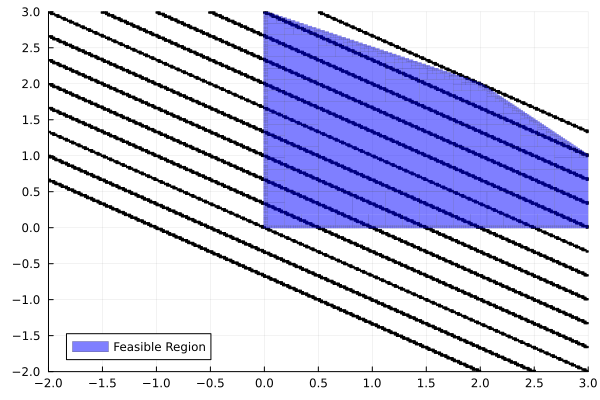

In [19]:
# part a

using Plots, ImplicitEquations, LaTeXStrings

f(x_1, x_2) = -2x_1 - 3x_2

g1(x_1, x_2) = x_1 + x_2 - 4
g2(x_1, x_2) = x_1 + 2x_2 - 6
g3(x_1, x_2) = -x_1
g4(x_1, x_2) = -x_2

x_min = -2
x_max = 3

y_min = -2
y_max = 3

x_step = (x_max - x_min) / 10
y_step = (y_max - y_min) / 10

f_values = -10:1:2
plot(xlims = (x_min, x_max), ylims = (y_min, y_max), 
    xticks = x_min:x_step:x_max, yticks = y_min:y_step:y_max,
    label = "")

for v in f_values
    plot!(f ⩵ v, xlims = (x_min, x_max), ylims = (y_min, y_max), 
    linewidth = 1, 
    label = "",
    )
end

r = (g1 ≦ 0) & (g2 ≦ 0) & (g3 ≦ 0) & (g4 ≦ 0)
plot!(r, xlims = (x_min, x_max), ylims = (y_min, y_max), fillcolor = :blue, 
    fillalpha = 0.5, 
    label = "Feasible Region",
    legend = :bottomleft,
)

By inspection, the optimal solution is at $\vec{x} = [2, 2]$

part b.

change inequalities to:
$$x_1 + x_2 + s_1 = 4,$$
$$x_1 + 2x_2 + s_2 = 6.$$

For iter 1:

Choose BFS = (0, 0, 4, 6).
| z | x1 | x2 | s1 | s2 | RHS |
|---|----|----|----|----|-----|
| 1 | 2  | 3  | 0  | 0  | 0   |
|   | 1  | 1  | 1  | 0  | 4   |
|   | 1  | 2  | 0  | 1  | 6   |

pivoting:

| z | x1 | x2 | s1 | s2 | RHS |
|---|----|----|----|----|-----|
| 1 | 0.5  | 0  | 0  | -1.5  | -9   |
|   | 0.5  | 0  | 1  | -0.5  | 1   |
|   | 0.5  | 1  | 0  | 0.5  | 3   |

new point: (0, 3, 1, 0)

not at optimal solution since x1 is positive in objective row. move to second iteration.

iter 2:

BFS = (0, 3, 1, 0)

| z | x1 | x2 | s1 | s2 | RHS |
|---|----|----|----|----|-----|
| 1 | 0.5  | 0  | 0  | -1.5  | -9   |
|   | 0.5  | 0  | 1  | -0.5  | 1   |
|   | 0.5  | 1  | 0  | 0.5  | 3   |

pivoting:

| z | x1 | x2 | s1 | s2 | RHS |
|---|----|----|----|----|-----|
| 1 | 0  | 0  | -1  | -1  | -10   |
|   | 1  | 0  | 2  | -1  | 2   |
|   | 0  | 1  | -1  | 1  | 2   |

new point: (2, 2, 0, 0)

since all variables are 0 or negative in objective row, we have an optimal solution at $z = -10; (x_1, x_2) = (2, 2)$.

# Problem 4

part a.

$\min \sum_i c_i m_i$

$\text{s.t.} \: \sum_i m_i = 100$

$\: \: \: \: \: \; \sum_i m_{i, Zn} - 30 \ge 0$

$\: \: \: \: \: \; \sum_i m_{i, Pb} - 30 \ge 0$

$\: \: \: \: \: \; \sum_i m_{i, Sn} - 38 \ge 0$

$\: \: \: \: \: \; 0 \le m_i \le M_i$

$\: \: \: \: \: \; i \in A$

where $m_i$ is the used mass of alloy $i$, $m_{i,e}$ is the mass fraction of element $e$ of alloy $i$. $M_i$ is the maximum amount of alloy $i$, and all alloys are denoted as the set $A$.

In [15]:
# part b

function problem4(A, m_Pb, m_Zn, m_Sn, c, M)
    
    model = Model(GAMS.Optimizer)
    set_optimizer_attribute(model, GAMS.ModelType(), "LP")
    set_optimizer_attribute(model, GAMS.Solver(), "CPLEX")
    
    @variables(model, begin
        0 <= m[i=1:A]
    end)

    @constraints(model, begin
        weight, sum(m[i] for i=1:A) == 100
        mass_Zn, sum(m_Zn[i] * m[i] for i=1:A) - 30 >= 0
        mass_Pb, sum(m_Pb[i] * m[i] for i=1:A) - 30 >= 0
        mass_Sn, sum(m_Sn[i] * m[i] for i=1:A) - 38 >= 0
        upper[i=1:A], m[i] <= M[i]
    end)

    @objective(model, Min, sum(c[i]*m[i] for i=1:A))
    
    # print(model)
    
    optimize!(model)
    println("")
    println("------------------------------")
    println("Solution status: ", primal_status(model))
    println("Optimal value: ", objective_value(model))
    println("Optimal solution: ", value.(m))
    println("------------------------------")
    
end

problem4 (generic function with 1 method)

In [16]:
using CSV, DataFrames

instance1 = DataFrame(CSV.File("instance1.csv"))
    
A = length(instance1[:, 1])
m_Pb = instance1[:, 2]
m_Zn = instance1[:, 3]
m_Sn = instance1[:, 4]
c = instance1[:, 5]
M = instance1[:, 6]

problem4(A, m_Pb, m_Zn, m_Sn, c, M)

--- Job moi.gms Start 11/13/23 19:09:41 45.1.0 88bbff72 WEX-WEI x86 64bit/MS Windows
--- Applying:
    B:\GAMS\gmsprmNT.txt
--- GAMS Parameters defined
    Input C:\Users\maste\AppData\Local\Temp\gams_jl_58Q1iE\moi.gms
    ScrDir C:\Users\maste\AppData\Local\Temp\gams_jl_58Q1iE\225a\
    SysDir B:\GAMS\
    CurDir C:\Users\maste\AppData\Local\Temp\gams_jl_58Q1iE\
    LimRow 0
    LimCol 0
    SolPrint 0
    SavePoint 1
    SolveLink 5
    Threads 1
    Solver CPLEX
Licensee: GAMS Demo, for EULA and demo limitations see   G230930/0001CB-GEN
          https://www.gams.com/latest/docs/UG%5FLicense.html         DC0000
          B:\GAMS\gamslice.txt
          Demo license for demonstration and instructional purposes only
Processor information: 1 socket(s), 16 core(s), and 32 thread(s) available
GAMS 45.1.0   Copyright (C) 1987-2023 GAMS Development. All rights reserved
--- Starting compilation
--- moi.gms(79) 3 Mb
--- Starting execution: elapsed 0:00:00.004
--- moi.gms(42) 4 Mb
--- Generati

In [17]:
instance2 = DataFrame(CSV.File("instance2.csv"))
    
A = length(instance2[:, 1])
m_Pb = instance2[:, 2]
m_Zn = instance2[:, 3]
m_Sn = instance2[:, 4]
c = instance2[:, 5]
M = instance2[:, 6]

problem4(A, m_Pb, m_Zn, m_Sn, c, M)

--- Job moi.gms Start 11/13/23 19:09:42 45.1.0 88bbff72 WEX-WEI x86 64bit/MS Windows
--- Applying:
    B:\GAMS\gmsprmNT.txt
--- GAMS Parameters defined
    Input C:\Users\maste\AppData\Local\Temp\gams_jl_SJ0vt3\moi.gms
    ScrDir C:\Users\maste\AppData\Local\Temp\gams_jl_SJ0vt3\225a\
    SysDir B:\GAMS\
    CurDir C:\Users\maste\AppData\Local\Temp\gams_jl_SJ0vt3\
    LimRow 0
    LimCol 0
    SolPrint 0
    SavePoint 1
    SolveLink 5
    Threads 1
    Solver CPLEX
Licensee: GAMS Demo, for EULA and demo limitations see   G230930/0001CB-GEN
          https://www.gams.com/latest/docs/UG%5FLicense.html         DC0000
          B:\GAMS\gamslice.txt
          Demo license for demonstration and instructional purposes only
Processor information: 1 socket(s), 16 core(s), and 32 thread(s) available
GAMS 45.1.0   Copyright (C) 1987-2023 GAMS Development. All rights reserved
--- Starting compilation
--- moi.gms(310) 3 Mb
--- Starting execution: elapsed 0:00:00.005
--- moi.gms(273) 4 Mb
--- Genera

In [18]:
instance3 = DataFrame(CSV.File("instance3.csv"))
    
A = length(instance3[:, 1])
m_Pb = instance3[:, 2]
m_Zn = instance3[:, 3]
m_Sn = instance3[:, 4]
c = instance3[:, 5]
M = instance3[:, 6]

problem4(A, m_Pb, m_Zn, m_Sn, c, M)

--- Job moi.gms Start 11/13/23 19:09:42 45.1.0 88bbff72 WEX-WEI x86 64bit/MS Windows
--- Applying:
    B:\GAMS\gmsprmNT.txt
--- GAMS Parameters defined
    Input C:\Users\maste\AppData\Local\Temp\gams_jl_vgKk06\moi.gms
    ScrDir C:\Users\maste\AppData\Local\Temp\gams_jl_vgKk06\225a\
    SysDir B:\GAMS\
    CurDir C:\Users\maste\AppData\Local\Temp\gams_jl_vgKk06\
    LimRow 0
    LimCol 0
    SolPrint 0
    SavePoint 1
    SolveLink 5
    Threads 1
    Solver CPLEX
Licensee: GAMS Demo, for EULA and demo limitations see   G230930/0001CB-GEN
          https://www.gams.com/latest/docs/UG%5FLicense.html         DC0000
          B:\GAMS\gamslice.txt
          Demo license for demonstration and instructional purposes only
Processor information: 1 socket(s), 16 core(s), and 32 thread(s) available
GAMS 45.1.0   Copyright (C) 1987-2023 GAMS Development. All rights reserved
--- Starting compilation
--- moi.gms(2679) 3 Mb
--- Starting execution: elapsed 0:00:00.014
--- moi.gms(2642) 4 Mb
--- Gene